In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('train.csv', error_bad_lines=False)

In [3]:
df.head();

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df=5)
X = vectorizer.fit_transform(df.text)

In [5]:
Y = df.type

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,random_state=25)
md = LogisticRegression(C=6)
md.fit(X_train, Y_train);

In [7]:
print("Обучение:")
pred = md.predict_proba(X_train)
print(roc_auc_score(Y_train,pred[:,1]))

print("Тест:")
pred = md.predict_proba(X_test)
print(roc_auc_score(Y_test,pred[:,1]))
a = vectorizer.transform(["Все было офигенно"])
print(md.predict_proba(a))

Обучение:
0.887928051809
Тест:
0.799312099749
[[ 0.22664241  0.77335759]]


In [8]:
test = pd.read_csv('test.csv')

In [9]:

days = test.day
test.head()
type(test.message)

pandas.core.series.Series

In [10]:
conv_test = vectorizer.transform(test.message)
pred = md.predict_proba(conv_test)
pred *= 100
pred = pred.round()
pred = pred.tolist()
positivities = []
negativities = []
messages = test.message.tolist()

In [11]:
for i in range(len(pred)):
    positivities.append(pred[i][1])
    negativities.append(pred[i][0])

In [12]:
tbl = pd.DataFrame({
    "Day": days,
    "Positivity": positivities,
    "Negativity": negativities,
    "Message": messages
})



In [61]:
dayTable = pd.DataFrame()
dayTable.Day = np.unique(tbl.Day)

dayTable.Day
positivities = []
negativities = []
for i in range(len(dayTable.Day)):
    positivities.append(np.mean(tbl[tbl.Day == dayTable.Day[i]]))
print(positivities[0][0])
dayTable = pd.DataFrame(columns = ["Day", "Positivity", "Negativity"])
for i in range(len(positivities)):
    m = pd.DataFrame({
        "Day": int(positivities[i][0]) ,
        "Positivity":int(positivities[i][2]) ,
        "Negativity":int(positivities[i][1]) 
    }, index = [1])
    dayTable = pd.concat([dayTable, m])
    dayTable.to_csv("testday.csv")

15.0


In [14]:
dayTable

,Day,Negativity,Positivity
1,15,36,63
1,16,41,58
1,17,37,62
1,18,33,66
1,19,37,62
1,20,46,53
1,21,40,59
1,22,43,56


In [15]:
#tbl.to_csv('stats.csv')
#dayTable.to_csv('')

In [16]:
tbl.head()

,Day,Message,Negativity,Positivity
0,15,кто уже бывал в гоуту просьба пройти в учебку...,13.0,87.0
1,15,а кто хочет размяться и поиграть в волейбол ил...,60.0,40.0
2,16,чат кмб,36.0,64.0
3,16,последняя строка,83.0,17.0
4,16,чтобы задачник работал,28.0,72.0


In [38]:
def predict(pr):
    a = vectorizer.transform(pr)
    return md.predict_proba(a)

def show(data):
    y = [3, 10, 7, 5, 3, 4.5, 6, 8.1]
    N = len(y)
    x = range(N)
    width = 1/1.5
    Y = (data*100)[0].tolist()
    Y = np.array(Y).round().tolist()
    for i in range(len(Y)):
        Y[i] = int(Y[i])
    print(Y)
    bars = plt.bar(range(len(Y)), Y, width, color="")
    plt.ylim(0, 100)
    bars[0].set_color("#DC143C")
    bars[1].set_color("#00FF00")
    plt.show()

def pl(text):
    show(predict(text))

в молодости я бегал за юбками, но все бы ничего если это было в шотландии
[27, 73]


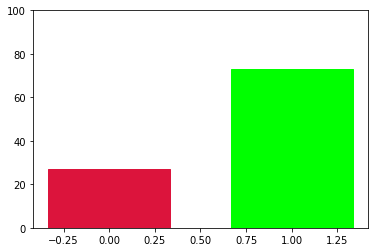

In [60]:
pl([input()])

In [45]:
#Telegram bot(copy paste)
